# CAAI Applied Machine Learning Pre-Doc - Analysis Task
---

- **Name:** Cameron Raymond
- **Current Date:** 
- **Due Date:** November 20, 2020
<!-- - **Submission link:** https://forms.gle/tagRjeGCQBHVZNiR9 -->

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

**1. Find the The IMDB-WIKI dataset**

IMDB-Wiki dataset can be found [here](https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/) and was created by Rothe, Timofte & Van Gool in 2015. It's the largest publically available dataset of human faces with gender, age, and name. It contains more than 500 thousand+ images with the associated meta information (Rothe, Timofte & Van Gool, 2015):
* `dob`: date of birth (Matlab serial date number)
* `photo_taken`: year when the photo was taken
* `full_path`: path to file
* `gender`: 0 for female and 1 for male, NaN if unknown
* `name`: name of the celebrity
* `face_location`: location of the face. 
* `face_score`: detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image
* `second_face_score`: detector score of the face with the second highest score. This is useful to ignore images with more than one face. second_face_score is NaN if no second face was detected.
* `celeb_names` (IMDB only): list of all celebrity names
* `celeb_id` (IMDB only): index of celebrity name

The original data set is quite unwieldy, but open-sourced code from [`imdeepmind`](https://github.com/imdeepmind/processed-imdb-wiki-dataset) provides a set of python scripts for processing the data. The processed metadata is stored in this project's root directory in the file `FILE.csv`. Since

In [2]:
meta_data = pd.read_csv("meta.csv")
meta_data.head()

,age,gender,path
0,30,female,imdb_crop/29/nm0005429_rm1549638400_1974-9-19_...
1,25,male,imdb_crop/94/nm1475594_rm3318716416_1980-4-26_...
2,32,male,imdb_crop/74/nm0004874_rm3353647104_1967-7-18_...
3,38,male,imdb_crop/97/nm0000197_rm3710499328_1937-4-22_...
4,44,female,imdb_crop/80/nm0004980_rm3604781312_1960-11-4_...


In [3]:
meta_data.describe()

,age
count,224840.000000
mean,36.245468
std,13.935410
min,-39.000000
25%,26.000000
50%,34.000000
75%,44.000000
max,429.000000


**2. Plot the age distribution of this population, and determine the size of the bucket “15 to 25 years old"**

On my first pass there were some notable outliers. First, there were values that were below 0, which doesn't make sense - as well as some values that were much older than any human could realistically be. Therefore I decided to remove any values below 5 or above 117 (which according to the [Guinness Book of World Records](https://www.guinnessworldrecords.com/news/2020/10/the-worlds-oldest-people-and-their-secrets-to-a-long-life-632895) is the age of the oldest living human, Kane Tanaka). We could also have set thresholds based on some percentile value, but in this case it doesn't make a difference.

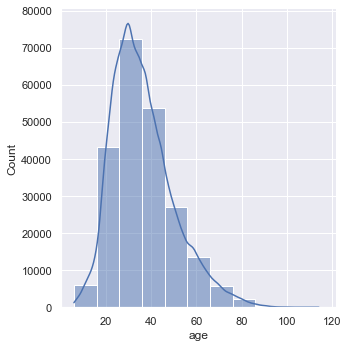

In [4]:
meta_data = meta_data[(meta_data["age"]>5) & (meta_data["age"]<117)] 
plt = sns.displot(meta_data, x="age",binwidth=10,kde=True)

In [5]:
age_counts = meta_data["age"].value_counts().sort_index()
below_25 = age_counts[(age_counts.index>=15) & (age_counts.index<25)]
print(f"Photos (Age 15-25):\t{below_25.sum()}")
# Taking the transpose of this dataframe is done purely for cosmetic reasons/to conserve space.
pd.DataFrame(age_counts).T.rename({"age":"Count"})

Photos (Age 15-25):	38272


,6,7,8,9,10,11,12,13,14,15,...,103,105,107,108,109,110,111,112,113,114
Count,127,225,284,347,518,671,768,909,1011,1220,...,3,1,3,1,3,4,1,2,4,1


**3. What percentage of this population is "30 year old males"?**


In [6]:
just_males = meta_data[(meta_data["age"]==30) & (meta_data["gender"]=="male")]
num_males,total_pop = len(just_males),len(meta_data)
print(f"Number of males aged 30:\t\t{num_males}")
print(f"Population Size:\t\t\t{total_pop}")
print(f"% of population that's 30 and male:\t{(num_males/total_pop)*100:.3f}%")

Number of males aged 30:		4166
Population Size:			224350
% of population that's 30 and male:	1.857%


**4. Using this dataset, how would you build an algorithm which can predict a person's age using their face?**

**5. What are the tradeoffs of the algorithm you selected? What is the loss function?**

**6. Would you trust this algorithm in high stake situations (for instance to detect minors at the airport)? Why/Why not?**

**7. Write the algorithm flowchart, and provide a legend explaining each step in the flowchart. How would you train this algorithm?How would you test the algorithm?**

## Sources

Rothe, Timofte & Van Gool. (2015). IMDB-WIKI [Data file]. Retrieved from https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/